In [1]:
import VGG_help
from VGG_help import prepare_dataset, vgg_model, cv_train_vgg_model, plot_train_history, evaluate_test_set

2024-04-22 18:47:01.436926: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
VGG_help.sns.set_theme()
path_dir = VGG_help.os.getcwd()
VGG_help.np.random.seed(123)
VGG_help.tf.random.set_seed(123)

# Loading the Dataset

## VGG on Original Dataset

In [3]:
dataset_dir = f'{path_dir}/Original'
class_labels = ['NORMAL', 'PNEUMONIA']

In [4]:
# Prepare dataset with resized images
X, y = prepare_dataset(dataset_dir, class_labels, target_size=(128, 128))


In [7]:
Orig_Data_Model_hist, original_data_model=cv_train_vgg_model(X,y)

Fold 1
Epoch 1/10
10/10 [==============================] - 1s 55ms/step - loss: 30.8871 - accuracy: 0.6834 - val_loss: 0.8155 - val_accuracy: 0.9500
Epoch 2/10
10/10 [==============================] - 0s 33ms/step - loss: 4.2596 - accuracy: 0.8979 - val_loss: 3.2159 - val_accuracy: 0.9250
Epoch 3/10
10/10 [==============================] - 0s 34ms/step - loss: 2.8548 - accuracy: 0.9460 - val_loss: 0.4960 - val_accuracy: 0.9875
Epoch 4/10
10/10 [==============================] - 0s 34ms/step - loss: 1.5888 - accuracy: 0.9450 - val_loss: 0.3010 - val_accuracy: 0.9875
Epoch 5/10
10/10 [==============================] - 0s 35ms/step - loss: 1.1793 - accuracy: 0.9665 - val_loss: 0.2702 - val_accuracy: 0.9875
Epoch 6/10
10/10 [==============================] - 0s 33ms/step - loss: 0.9802 - accuracy: 0.9655 - val_loss: 0.2775 - val_accuracy: 0.9750
Epoch 7/10
10/10 [==============================] - 0s 33ms/step - loss: 0.2234 - accuracy: 0.9907 - val_loss: 0.4427 - val_accuracy: 0.9625
Epoch

In [8]:
Orig_Data_Model_hist

,Fold,Train Loss,Train Accuracy,Val Loss,Val Accuracy,Val Accuracy Mean
0,1,"[21.49, 4.51, 3.91, 1.55, 0.98, 0.82, 0.4, 0.1...","[0.76, 0.9, 0.94, 0.94, 0.97, 0.97, 0.99, 0.99...","[0.82, 3.22, 0.5, 0.3, 0.27, 0.28, 0.44, 0.34,...","[0.95, 0.93, 0.99, 0.99, 0.99, 0.98, 0.96, 0.9...",1.00
1,2,"[21.74, 2.68, 2.32, 1.22, 0.44, 0.71, 0.38, 0....","[0.7, 0.94, 0.95, 0.97, 0.97, 0.98, 0.99, 0.99...","[5.47, 5.02, 3.05, 4.2, 3.73, 5.24, 3.83, 2.82...","[0.86, 0.93, 0.91, 0.95, 0.91, 0.94, 0.9, 0.95...",0.94
2,3,"[18.15, 4.62, 2.02, 1.42, 1.41, 0.33, 0.57, 0....","[0.73, 0.92, 0.95, 0.96, 0.97, 0.99, 0.99, 0.9...","[10.55, 2.86, 0.29, 1.33, 0.68, 1.78, 0.72, 1....","[0.85, 0.94, 0.99, 0.98, 0.96, 0.94, 0.98, 0.9...",0.99
3,4,"[17.68, 4.5, 2.46, 1.54, 0.88, 0.84, 0.67, 0.9...","[0.75, 0.93, 0.94, 0.96, 0.98, 0.98, 0.98, 0.9...","[4.52, 5.23, 6.91, 5.52, 6.74, 4.23, 6.76, 3.7...","[0.93, 0.91, 0.93, 0.91, 0.94, 0.94, 0.94, 0.9...",0.95
4,5,"[50.42, 5.67, 3.7, 1.71, 0.37, 0.31, 0.08, 0.0...","[0.57, 0.8, 0.9, 0.93, 0.98, 0.97, 0.98, 0.99,...","[3.04, 2.79, 2.38, 2.65, 1.2, 0.82, 0.85, 0.87...","[0.84, 0.9, 0.89, 0.89, 0.95, 0.96, 0.96, 0.96...",0.96


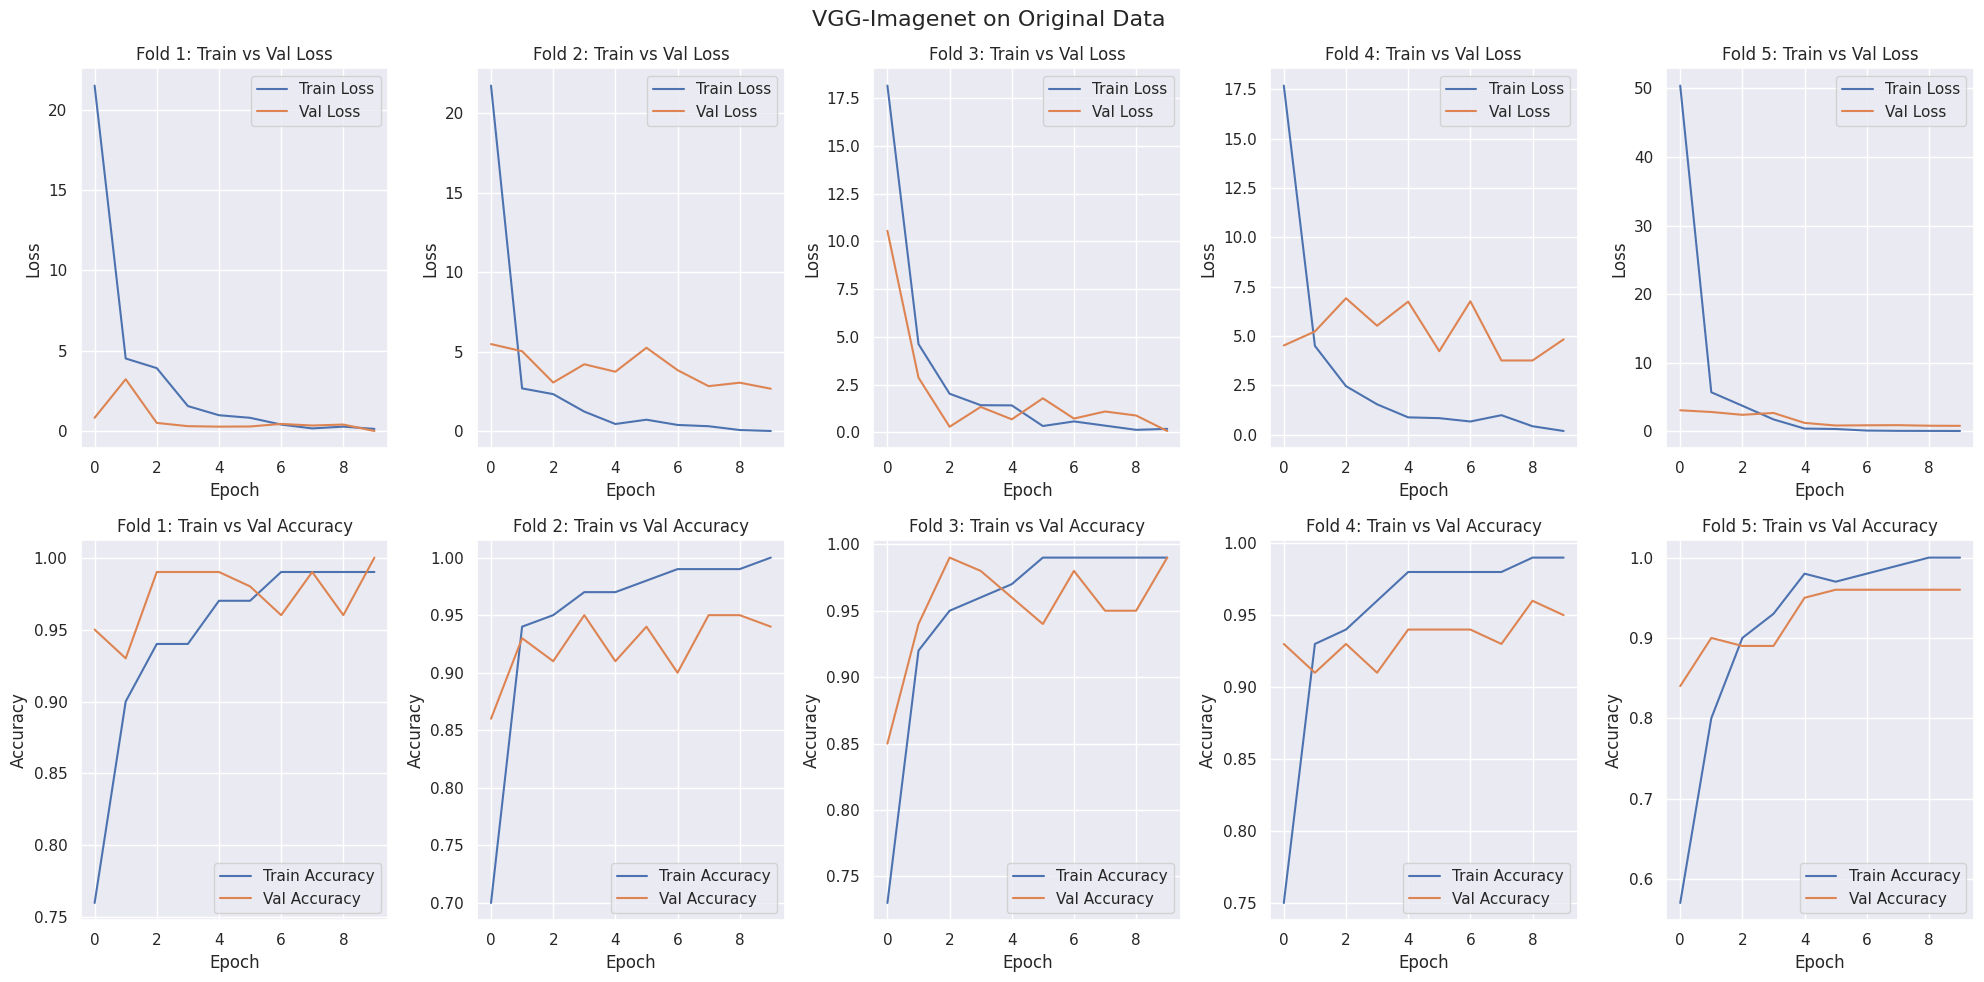

In [9]:
title = "VGG-Imagenet on Original Data "
file_name = "training_history_plot.png"

plot_train_history(Orig_Data_Model_hist, title, file_name)

In [10]:
Orig_Data_Model_hist.to_csv('Original_Data_VGG_Training.csv', index=False)

In [11]:
!pwd

/users/PCS0218/nonlinearity114/CS7200_SP2024_Project_G01/Notebooks/VGG16-classification


## TESTING

## On Test Data

In [12]:
def test_on_data(dataset_dir, model):
    class_labels = ['NORMAL', 'PNEUMONIA']
    X_test, y_test = prepare_dataset(dataset_dir, class_labels, target_size=(128, 128))
    metrics_dict, cf_matrix = evaluate_test_set(model, X_test, y_test)
    return metrics_dict, cf_matrix



In [13]:
test_dataset_dir = '/users/PCS0218/nonlinearity114/CS7200_SP2024_Project_G01/Notebooks/Data/Test'


In [14]:
orig_test_metrics, orig_cf_matrix=test_on_data(test_dataset_dir,  original_data_model)

105/105 [==============================] - 12s 114ms/step - loss: 1.4579 - accuracy: 0.9521


In [15]:
orig_test_metrics

{'Test Loss': 1.4579,
 'Test Accuracy': 0.9521,
 'F1 Score': 0.95,
 'Sensitivity (Recall)': 0.95,
 'Precision': 0.95}

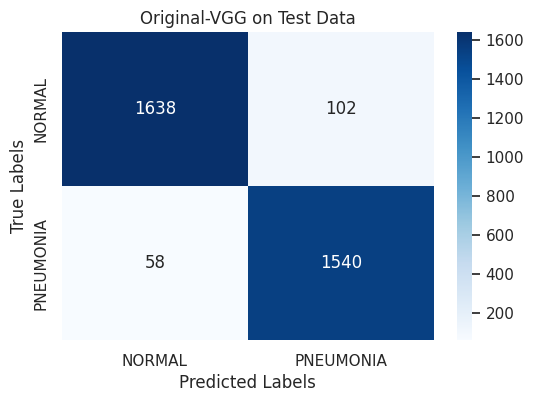

In [17]:
VGG_help.plot_confusion_matrix(orig_cf_matrix, class_labels, 'Original-VGG on Test Data')

## on DDPM Images

In [18]:
dataset_dir_ddpm = '/users/PCS0218/nonlinearity114/CS7200_SP2024_Project_G01/Notebooks/VGG16-classification/DDPM_Generated'


In [19]:
orig_test_metrics_on_ddpm, orig_cf_matrix_on_ddpm=test_on_data(dataset_dir_ddpm,  original_data_model)

13/13 [==============================] - 0s 24ms/step - loss: 1.4554 - accuracy: 0.9425


In [20]:
orig_test_metrics_on_ddpm

{'Test Loss': 1.4554,
 'Test Accuracy': 0.9425,
 'F1 Score': 0.94,
 'Sensitivity (Recall)': 0.94,
 'Precision': 0.95}

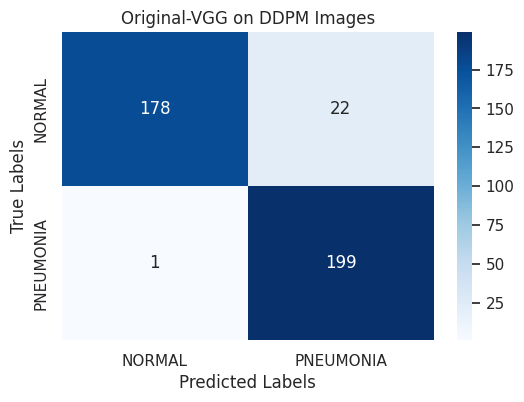

In [21]:
VGG_help.plot_confusion_matrix(orig_cf_matrix_on_ddpm, class_labels, 'Original-VGG on DDPM Images')

## on PGGAN 150k

In [22]:
# TRaining PGANs with channels=512 @200k epochs, extracted at epoch 150k 
dataset_dir_pggan='/users/PCS0218/nonlinearity114/PGAN/Images512ch150'


In [23]:
orig_test_metrics_on_PGGAN150, orig_cf_matrix_on_PGGAN150=test_on_data(dataset_dir_pggan,  original_data_model)
orig_test_metrics_on_PGGAN150

13/13 [==============================] - 0s 23ms/step - loss: 6.6948 - accuracy: 0.7325


{'Test Loss': 6.6948,
 'Test Accuracy': 0.7325,
 'F1 Score': 0.71,
 'Sensitivity (Recall)': 0.73,
 'Precision': 0.82}

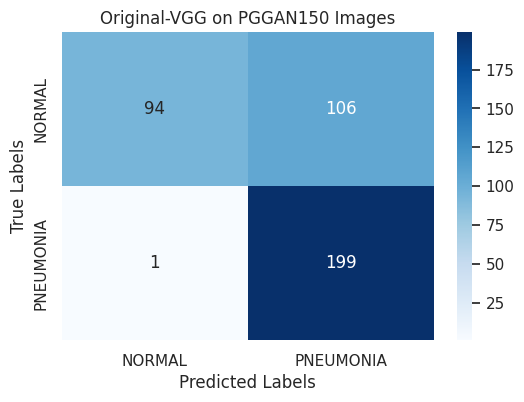

In [24]:
VGG_help.plot_confusion_matrix(orig_cf_matrix_on_PGGAN150, class_labels, 'Original-VGG on PGGAN150 Images')

In [25]:
# TRaining PGANs with channels=512 @200k epochs, extracted at epoch 160k 
dataset_dir_pggan160='/users/PCS0218/nonlinearity114/PGAN/Images512ch160'


In [27]:
orig_test_metrics_on_PGGAN160, orig_cf_matrix_on_PGGAN160=test_on_data(dataset_dir_pggan160,  original_data_model)

13/13 [==============================] - 0s 24ms/step - loss: 21.1629 - accuracy: 0.6350


In [28]:
orig_test_metrics_on_PGGAN160

{'Test Loss': 21.1629,
 'Test Accuracy': 0.635,
 'F1 Score': 0.58,
 'Sensitivity (Recall)': 0.64,
 'Precision': 0.79}

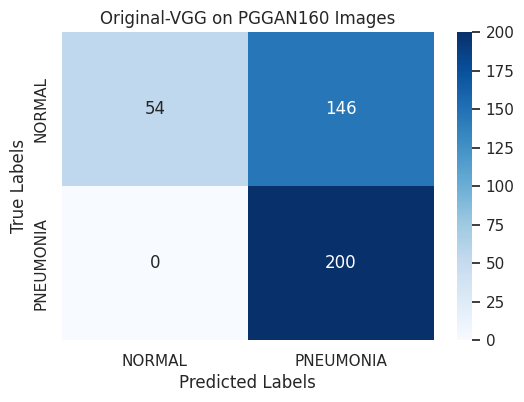

In [30]:
VGG_help.plot_confusion_matrix(orig_cf_matrix_on_PGGAN160, class_labels,'Original-VGG on PGGAN160 Images')

# VGG on DDPM +Original

In [32]:
X, y = prepare_dataset('/users/PCS0218/nonlinearity114/CS7200_SP2024_Project_G01/Notebooks/VGG16-classification/Mixed_DDPM', class_labels, target_size=(128, 128))
MixDDPM_Data_Model_hist, MixDDPM_data_model=cv_train_vgg_model(X,y)

Fold 1
Epoch 1/10
20/20 [==============================] - 11s 545ms/step - loss: 14.8290 - accuracy: 0.7197 - val_loss: 2.6180 - val_accuracy: 0.9375
Epoch 2/10
20/20 [==============================] - 1s 35ms/step - loss: 2.1055 - accuracy: 0.9474 - val_loss: 1.6837 - val_accuracy: 0.9812
Epoch 3/10
20/20 [==============================] - 1s 33ms/step - loss: 0.3474 - accuracy: 0.9890 - val_loss: 1.3987 - val_accuracy: 0.9750
Epoch 4/10
20/20 [==============================] - 1s 33ms/step - loss: 0.0963 - accuracy: 0.9973 - val_loss: 1.8499 - val_accuracy: 0.9750
Epoch 5/10
20/20 [==============================] - 1s 31ms/step - loss: 0.0797 - accuracy: 0.9906 - val_loss: 1.3511 - val_accuracy: 0.9812
Epoch 6/10
20/20 [==============================] - 1s 31ms/step - loss: 0.0497 - accuracy: 0.9922 - val_loss: 1.5684 - val_accuracy: 0.9688
Epoch 7/10
20/20 [==============================] - 1s 32ms/step - loss: 0.0918 - accuracy: 0.9903 - val_loss: 1.2870 - val_accuracy: 0.9750
Epo

In [33]:
Mix_ddpm_test_metrics, Mix_ddpm_cf_matrix=test_on_data(test_dataset_dir,  MixDDPM_data_model)

105/105 [==============================] - 2s 23ms/step - loss: 2.9514 - accuracy: 0.9560


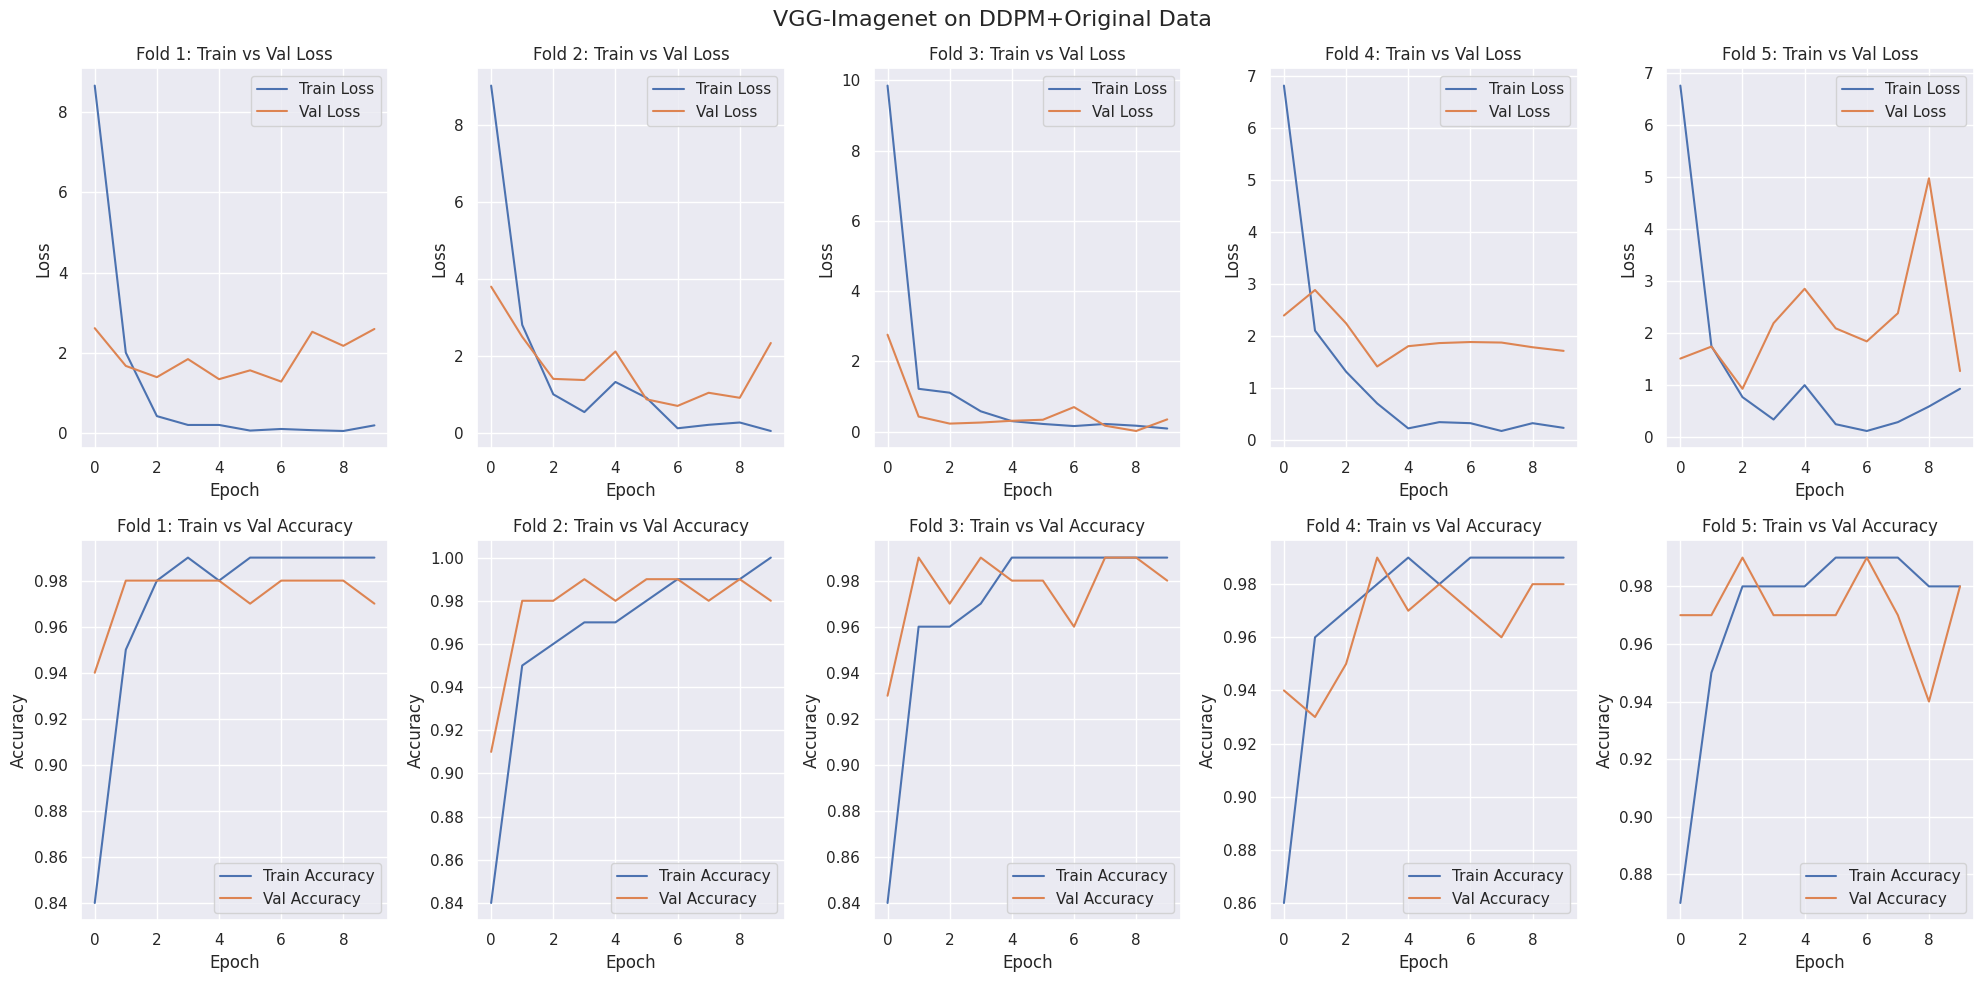

In [34]:
plot_train_history(MixDDPM_Data_Model_hist, 'VGG-Imagenet on DDPM+Original Data', 'ddpm_mix_vgg.png')

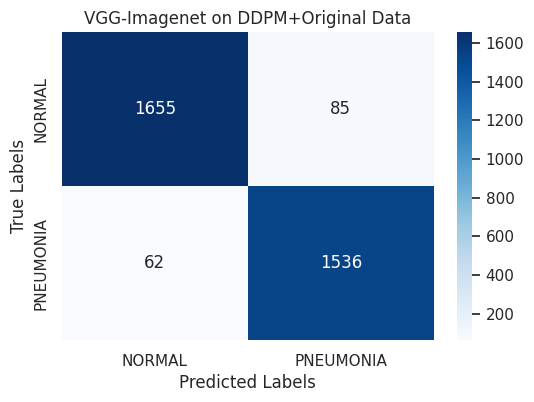

In [36]:
VGG_help.plot_confusion_matrix(Mix_ddpm_cf_matrix, class_labels, 'VGG-Imagenet on DDPM+Original Data')


In [37]:
Mix_ddpm_test_metrics

{'Test Loss': 2.9514,
 'Test Accuracy': 0.956,
 'F1 Score': 0.96,
 'Sensitivity (Recall)': 0.96,
 'Precision': 0.96}

# VGG on Mixed PGGANs 150 + Original

In [38]:
X, y = prepare_dataset('/users/PCS0218/nonlinearity114/CS7200_SP2024_Project_G01/Notebooks/VGG16-classification/DataPGANS/Mixed150', class_labels, target_size=(128, 128))
MixPGGAN_Data_Model_hist, MixPGGAN_data_model=cv_train_vgg_model(X,y)

Fold 1
Epoch 1/10
20/20 [==============================] - 1s 43ms/step - loss: 11.8831 - accuracy: 0.7573 - val_loss: 5.7146 - val_accuracy: 0.8813
Epoch 2/10
20/20 [==============================] - 1s 31ms/step - loss: 2.6971 - accuracy: 0.9290 - val_loss: 1.1892 - val_accuracy: 0.9563
Epoch 3/10
20/20 [==============================] - 1s 31ms/step - loss: 0.7040 - accuracy: 0.9659 - val_loss: 0.4989 - val_accuracy: 0.9750
Epoch 4/10
20/20 [==============================] - 1s 31ms/step - loss: 0.5047 - accuracy: 0.9624 - val_loss: 0.5788 - val_accuracy: 0.9750
Epoch 5/10
20/20 [==============================] - 1s 31ms/step - loss: 0.1772 - accuracy: 0.9893 - val_loss: 1.0191 - val_accuracy: 0.9750
Epoch 6/10
20/20 [==============================] - 1s 31ms/step - loss: 0.0304 - accuracy: 0.9949 - val_loss: 1.1752 - val_accuracy: 0.9563
Epoch 7/10
20/20 [==============================] - 1s 31ms/step - loss: 0.0265 - accuracy: 0.9967 - val_loss: 1.1520 - val_accuracy: 0.9563
Epoch

In [39]:
Mix_pggan_test_metrics, Mix_pggan_cf_matrix=test_on_data(test_dataset_dir,  MixPGGAN_data_model)

105/105 [==============================] - 3s 24ms/step - loss: 2.1022 - accuracy: 0.9557


In [40]:
Mix_pggan_test_metrics

{'Test Loss': 2.1022,
 'Test Accuracy': 0.9557,
 'F1 Score': 0.96,
 'Sensitivity (Recall)': 0.96,
 'Precision': 0.96}

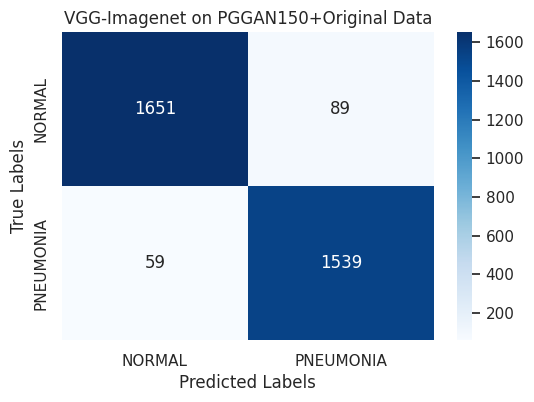

In [41]:
VGG_help.plot_confusion_matrix(Mix_pggan_cf_matrix, class_labels, 'VGG-Imagenet on PGGAN150+Original Data')


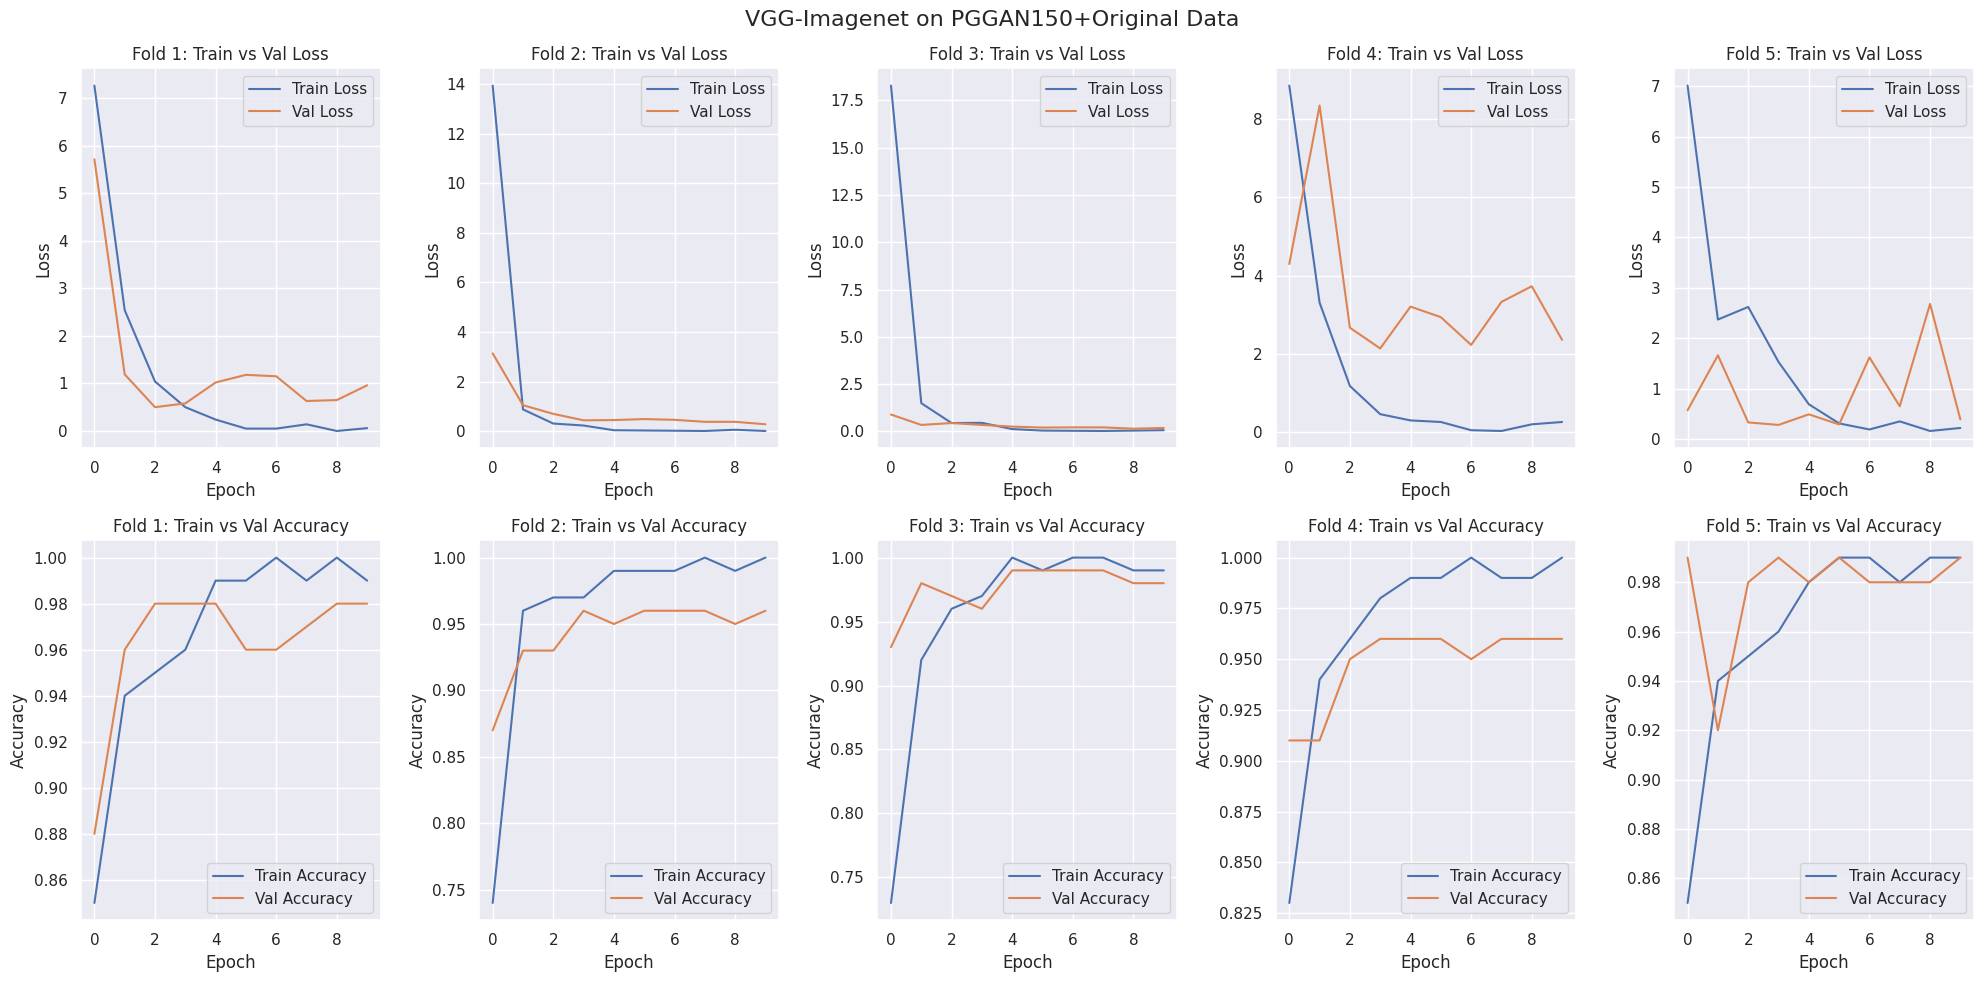

In [42]:
plot_train_history(MixPGGAN_Data_Model_hist, 'VGG-Imagenet on PGGAN150+Original Data', 'pggan_mix_vgg.png')

# VGG on Mixed PGGAN160 + Original

In [43]:
X, y = prepare_dataset('/users/PCS0218/nonlinearity114/CS7200_SP2024_Project_G01/Notebooks/VGG16-classification/DataPGANS/Mixed160', class_labels, target_size=(128, 128))
MixPGGAN_Data_Model_hist160, MixPGGAN_data_model160=cv_train_vgg_model(X,y)

Fold 1
Epoch 1/10
20/20 [==============================] - 1s 42ms/step - loss: 6.4066 - accuracy: 0.8053 - val_loss: 5.0444 - val_accuracy: 0.9000
Epoch 2/10
20/20 [==============================] - 1s 34ms/step - loss: 2.7959 - accuracy: 0.9373 - val_loss: 1.9243 - val_accuracy: 0.9563
Epoch 3/10
20/20 [==============================] - 1s 31ms/step - loss: 1.0482 - accuracy: 0.9530 - val_loss: 1.4809 - val_accuracy: 0.9812
Epoch 4/10
20/20 [==============================] - 1s 31ms/step - loss: 0.4024 - accuracy: 0.9917 - val_loss: 1.2195 - val_accuracy: 0.9750
Epoch 5/10
20/20 [==============================] - 1s 32ms/step - loss: 0.5085 - accuracy: 0.9854 - val_loss: 1.7143 - val_accuracy: 0.9750
Epoch 6/10
20/20 [==============================] - 1s 31ms/step - loss: 0.2870 - accuracy: 0.9883 - val_loss: 1.3525 - val_accuracy: 0.9688
Epoch 7/10
20/20 [==============================] - 1s 31ms/step - loss: 0.1033 - accuracy: 0.9914 - val_loss: 0.9756 - val_accuracy: 0.9875
Epoch 

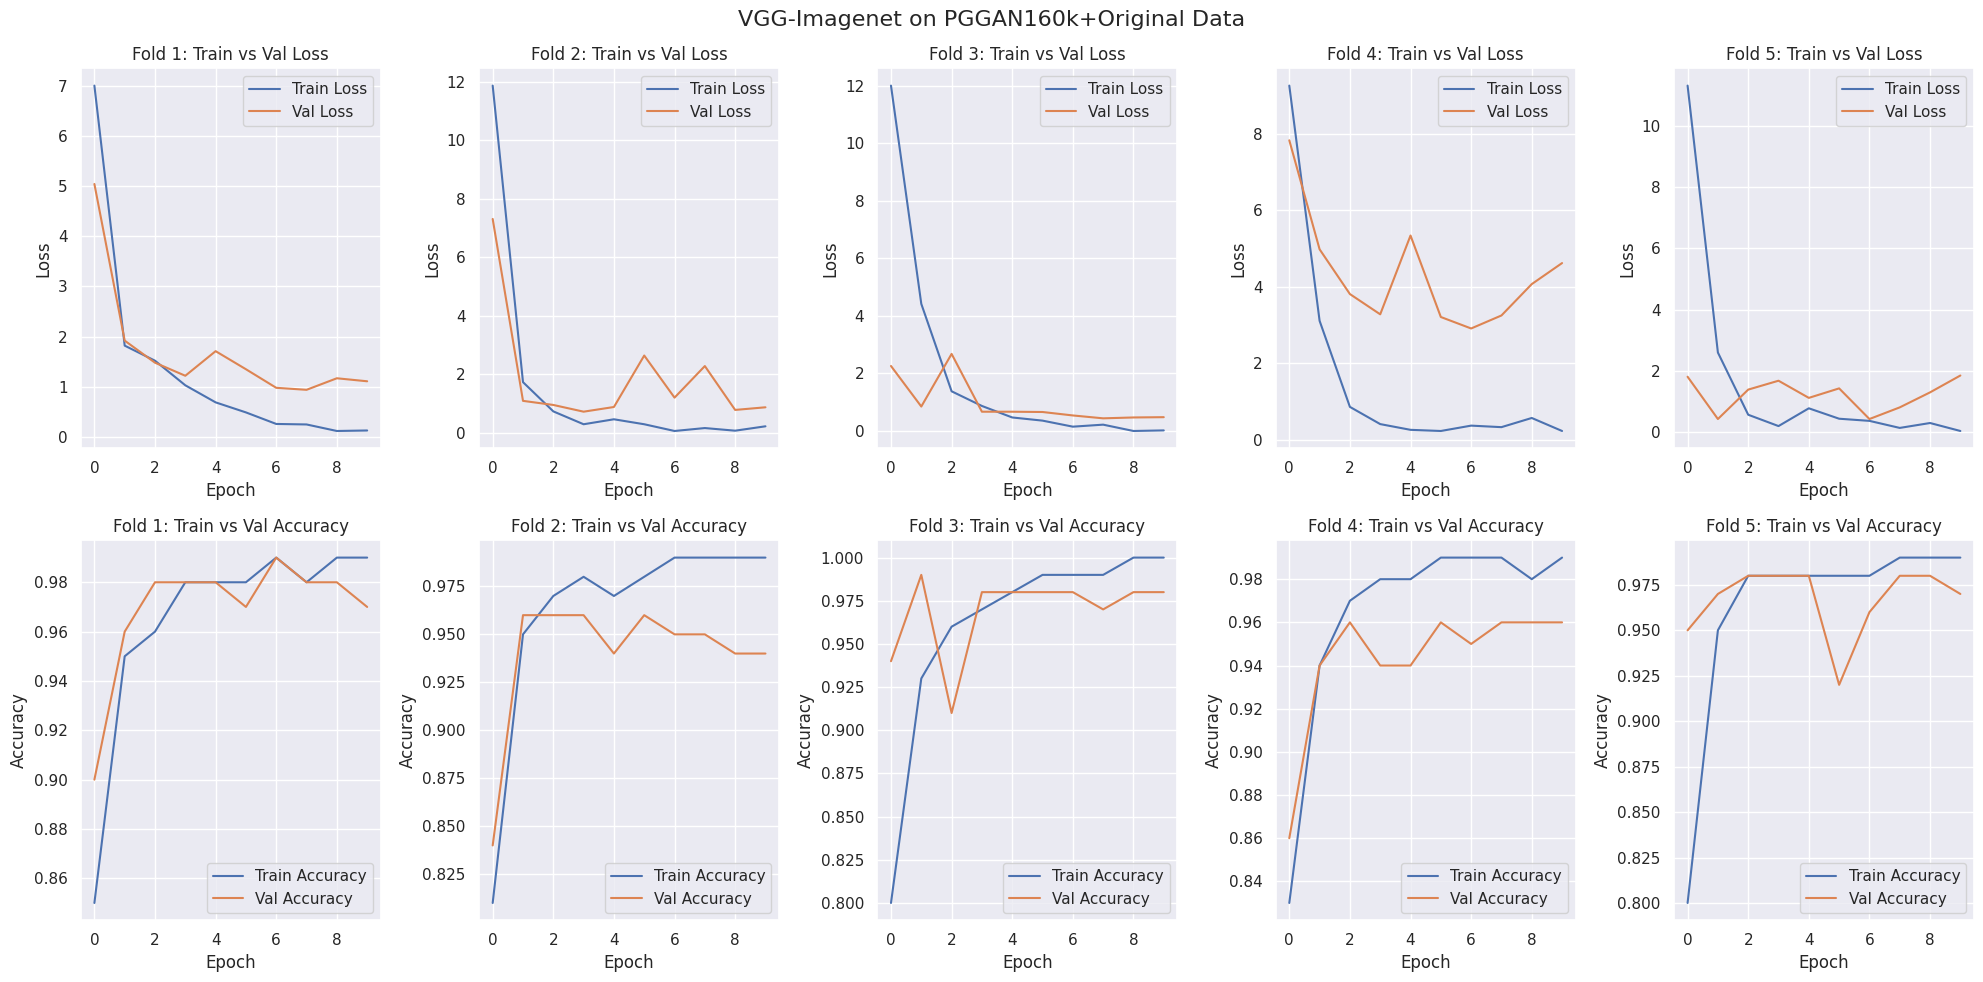

In [44]:
plot_train_history(MixPGGAN_Data_Model_hist160, 'VGG-Imagenet on PGGAN160k+Original Data', 'pggan160_mix_vgg.png')

In [45]:
Mix_pggan160_test_metrics, Mix_pggan160_cf_matrix=test_on_data(test_dataset_dir,  MixPGGAN_data_model160)

105/105 [==============================] - 3s 24ms/step - loss: 1.7269 - accuracy: 0.9434


In [46]:
Mix_pggan160_test_metrics

{'Test Loss': 1.7269,
 'Test Accuracy': 0.9434,
 'F1 Score': 0.94,
 'Sensitivity (Recall)': 0.94,
 'Precision': 0.94}

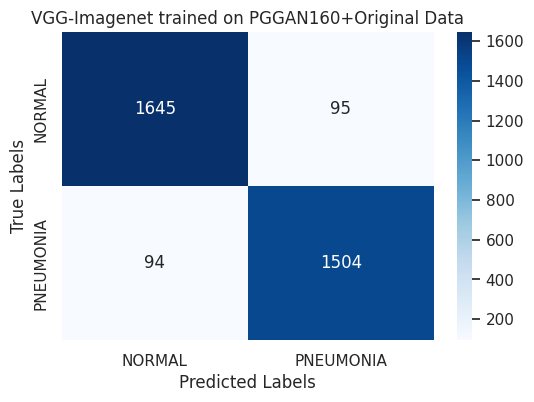

In [53]:
VGG_help.plot_confusion_matrix(Mix_pggan160_cf_matrix, class_labels, 'VGG-Imagenet trained on PGGAN160+Original Data')

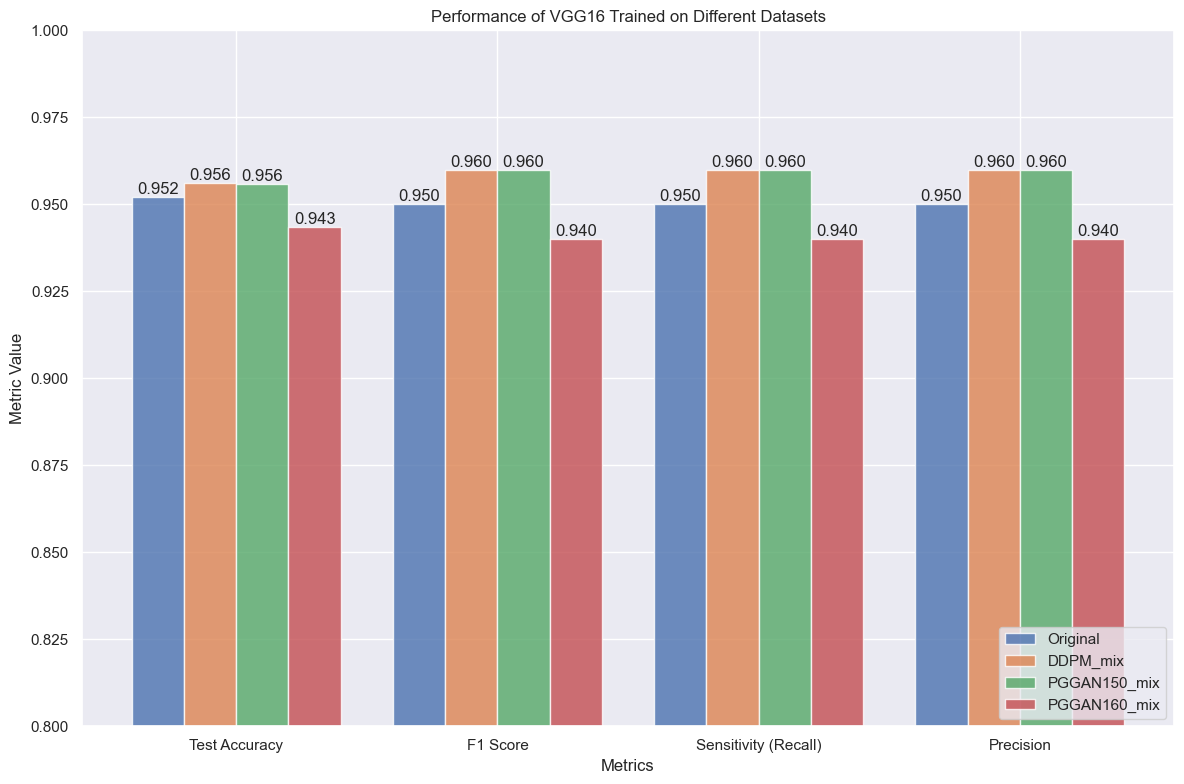

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the models and metrics
models = ['Original', 'DDPM_mix', 'PGGAN150_mix', 'PGGAN160_mix']
metrics = ['Test Accuracy', 'F1 Score', 'Sensitivity (Recall)', 'Precision']

# Data for the models and metrics
data = {
    'Original': {'Test Accuracy': 0.9521, 'F1 Score': 0.95, 'Sensitivity (Recall)': 0.95, 'Precision': 0.95},
    'DDPM_mix': {'Test Accuracy': 0.956, 'F1 Score': 0.96, 'Sensitivity (Recall)': 0.96, 'Precision': 0.96},
    'PGGAN150_mix': {'Test Accuracy': 0.9557, 'F1 Score': 0.96, 'Sensitivity (Recall)': 0.96, 'Precision': 0.96},
    'PGGAN160_mix': {'Test Accuracy': 0.9434, 'F1 Score': 0.94, 'Sensitivity (Recall)': 0.94, 'Precision': 0.94}
}

# Arrange the data for plotting
num_models = len(models)
num_metrics = len(metrics)
bar_width = 0.2
index = np.arange(num_metrics)  # the label locations
opacity = 0.8

# Set seaborn style and color palette
sns.set_theme()

# Plotting each model grouped by metric
fig, ax = plt.subplots(figsize=(12, 8))

for i, model in enumerate(models):
    metric_values = [data[model][metric] for metric in metrics]
    ax.bar(index + i * bar_width, metric_values, bar_width, alpha=opacity, label=model)

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Metric Value')
ax.set_title('Performance of VGG16 Trained on Different Datasets')

# Set x-axis labels and ticks
ax.set_xticks(index + (num_models - 1) * bar_width / 2)
ax.set_xticklabels(metrics)
ax.set_ylim(0.8, 1.0)  # Adjust the limits as needed

# Annotate each bar with its value
for i, model in enumerate(models):
    for j, metric in enumerate(metrics):
        value = data[model][metric]
        ax.text(index[j] + i * bar_width, value , f'{value:.3f}', ha='center', va='bottom')

# Place legend at the bottom right
ax.legend(loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
from IPython.display import display, HTML

# Convert data to DataFrame
df = pd.DataFrame(data).T  # Transpose to have models as rows

df


,Test Accuracy,F1 Score,Sensitivity (Recall),Precision
Original,0.9521,0.95,0.95,0.95
DDPM,0.9560,0.96,0.96,0.96
PGGAN150,0.9557,0.96,0.96,0.96
PGGAN160,0.9434,0.94,0.94,0.94


# Train VGG on All Data

In [48]:
all_data_dir = '/users/PCS0218/nonlinearity114/CS7200_SP2024_Project_G01/Notebooks/Data/All'

In [49]:
X, y = prepare_dataset(all_data_dir, class_labels, target_size=(128, 128))


In [50]:
All_Data_Model_hist, All_data_model=cv_train_vgg_model(X,y)

Fold 1
Epoch 1/10
86/86 [==============================] - 16s 174ms/step - loss: 18.9302 - accuracy: 0.7935 - val_loss: 0.2396 - val_accuracy: 0.9663
Epoch 2/10
86/86 [==============================] - 3s 31ms/step - loss: 0.1478 - accuracy: 0.9677 - val_loss: 0.1462 - val_accuracy: 0.9605
Epoch 3/10
86/86 [==============================] - 3s 30ms/step - loss: 0.0982 - accuracy: 0.9574 - val_loss: 0.2127 - val_accuracy: 0.9561
Epoch 4/10
86/86 [==============================] - 3s 30ms/step - loss: 0.0619 - accuracy: 0.9768 - val_loss: 0.1495 - val_accuracy: 0.9634
Epoch 5/10
86/86 [==============================] - 3s 30ms/step - loss: 0.0595 - accuracy: 0.9800 - val_loss: 0.1910 - val_accuracy: 0.9634
Epoch 6/10
86/86 [==============================] - 3s 30ms/step - loss: 0.0530 - accuracy: 0.9824 - val_loss: 0.2229 - val_accuracy: 0.9531
Epoch 7/10
86/86 [==============================] - 3s 30ms/step - loss: 0.0621 - accuracy: 0.9804 - val_loss: 0.1780 - val_accuracy: 0.9678
Epo

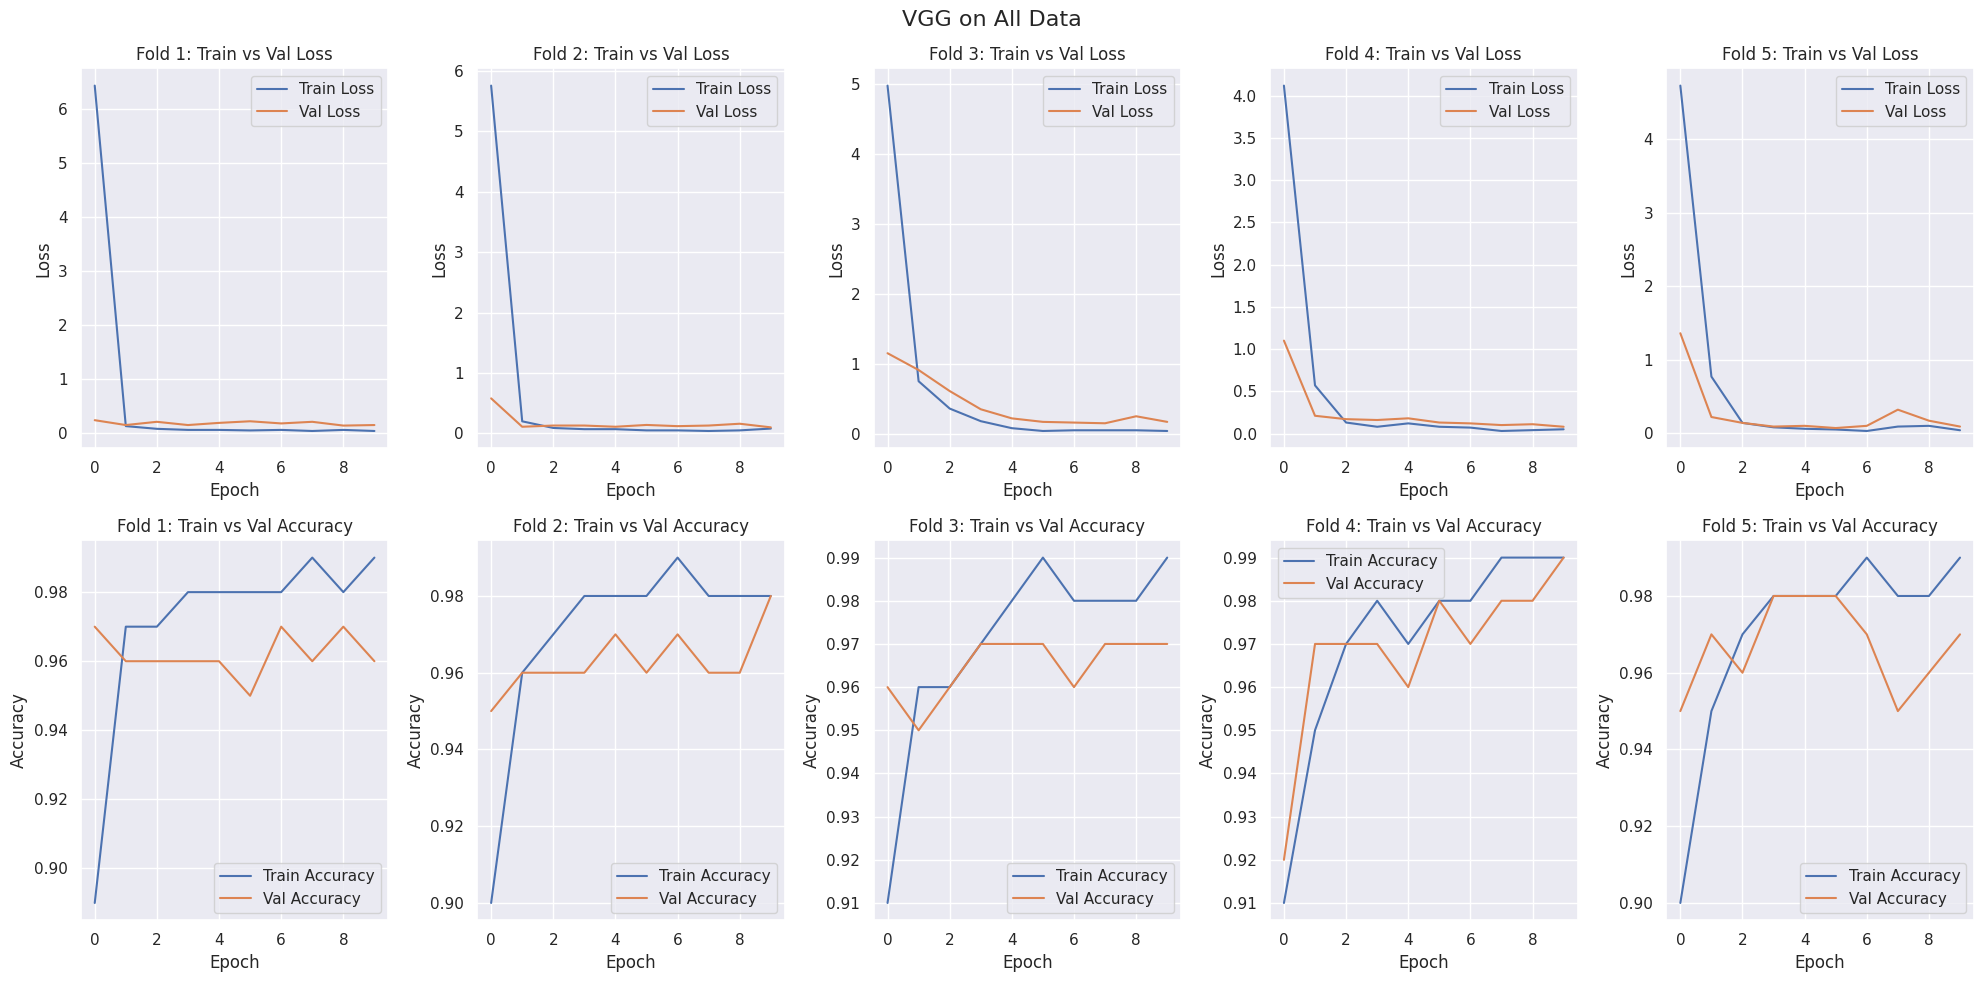

In [51]:
plot_train_history(All_Data_Model_hist, 'VGG on All Data', 'vgg_all_train.png')

In [52]:
#test All data VGG on PGGAN150
all_test_metrics_on_PGGAN150, all_cf_matrix_on_PGGAN150=test_on_data(dataset_dir_pggan,  All_data_model)

13/13 [==============================] - 0s 23ms/step - loss: 1.0568 - accuracy: 0.7125


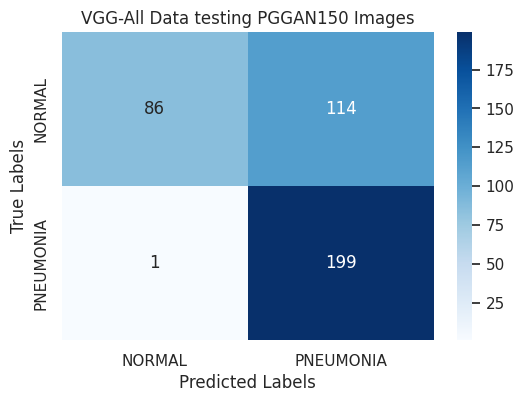

In [55]:
VGG_help.plot_confusion_matrix(all_cf_matrix_on_PGGAN150, class_labels, 'VGG-All Data testing PGGAN150 Images')

In [56]:
all_test_metrics_on_PGGAN150

{'Test Loss': 1.0568,
 'Test Accuracy': 0.7125,
 'F1 Score': 0.69,
 'Sensitivity (Recall)': 0.71,
 'Precision': 0.81}

In [57]:
#test All data VGG on PGGAN160
all_test_metrics_on_PGGAN160, all_cf_matrix_on_PGGAN160=test_on_data(dataset_dir_pggan160,  All_data_model)

13/13 [==============================] - 0s 23ms/step - loss: 3.5976 - accuracy: 0.6775


In [58]:
all_test_metrics_on_PGGAN160

{'Test Loss': 3.5976,
 'Test Accuracy': 0.6775,
 'F1 Score': 0.64,
 'Sensitivity (Recall)': 0.68,
 'Precision': 0.8}

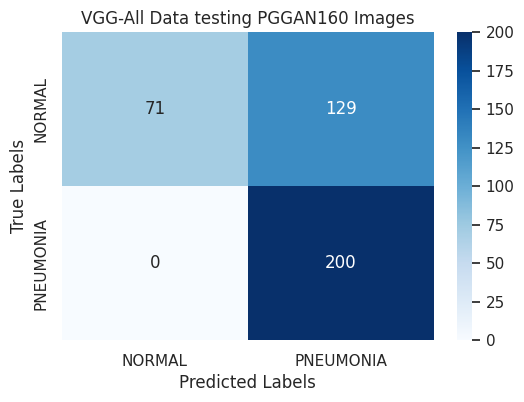

In [60]:
VGG_help.plot_confusion_matrix(all_cf_matrix_on_PGGAN160, class_labels, 'VGG-All Data testing PGGAN160 Images')

In [61]:
#test All data VGG on DDPM
all_test_metrics_on_ddpm, all_cf_matrix_on_ddpm=test_on_data(dataset_dir_ddpm,  All_data_model)

13/13 [==============================] - 0s 23ms/step - loss: 0.4519 - accuracy: 0.8875


In [62]:
all_test_metrics_on_ddpm

{'Test Loss': 0.4519,
 'Test Accuracy': 0.8875,
 'F1 Score': 0.89,
 'Sensitivity (Recall)': 0.89,
 'Precision': 0.91}

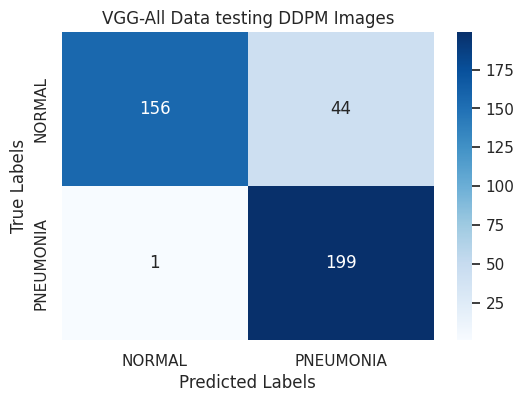

In [63]:
VGG_help.plot_confusion_matrix(all_cf_matrix_on_ddpm, class_labels, 'VGG-All Data testing DDPM Images')

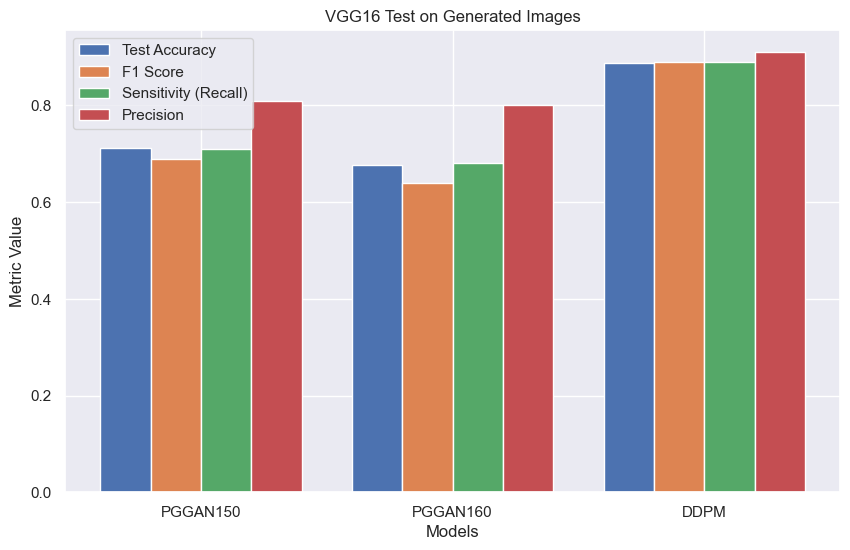

In [10]:


# Data for the models
models = ['PGGAN150', 'PGGAN160', 'DDPM']
metrics = ['Test Accuracy', 'F1 Score', 'Sensitivity (Recall)', 'Precision']

# Test metrics data for each model
data = {
    'PGGAN150': {'Test Accuracy': 0.7125, 'F1 Score': 0.69, 'Sensitivity (Recall)': 0.71, 'Precision': 0.81},
    'PGGAN160': {'Test Accuracy': 0.6775, 'F1 Score': 0.64, 'Sensitivity (Recall)': 0.68, 'Precision': 0.8},
    'DDPM': {'Test Accuracy': 0.8875, 'F1 Score': 0.89, 'Sensitivity (Recall)': 0.89, 'Precision': 0.91}
}

# Arrange the data for plotting
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting each metric for all models
fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    metric_values = [data[model][metric] for model in models]
    ax.bar(x + (i - 1.5) * width, metric_values, width, label=metric)

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Metric Value')
ax.set_title('VGG16 Test on Generated Images')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.show()


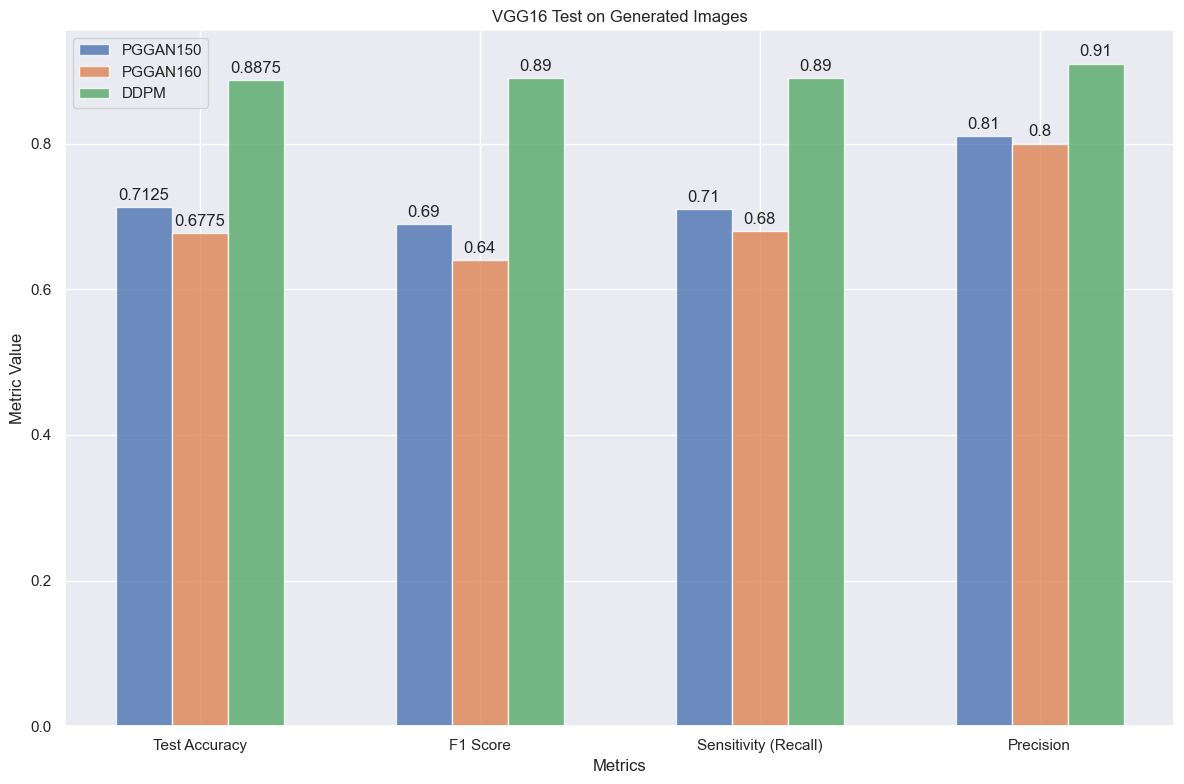

In [16]:

# Define the models and metrics
models = ['PGGAN150', 'PGGAN160', 'DDPM']
metrics = ['Test Accuracy', 'F1 Score', 'Sensitivity (Recall)', 'Precision']

# Data for the models and metrics
data = {
    'PGGAN150': {'Test Accuracy': 0.7125, 'F1 Score': 0.69, 'Sensitivity (Recall)': 0.71, 'Precision': 0.81},
    'PGGAN160': {'Test Accuracy': 0.6775, 'F1 Score': 0.64, 'Sensitivity (Recall)': 0.68, 'Precision': 0.8},
    'DDPM': {'Test Accuracy': 0.8875, 'F1 Score': 0.89, 'Sensitivity (Recall)': 0.89, 'Precision': 0.91}
}

# Arrange the data for plotting
num_models = len(models)
num_metrics = len(metrics)
bar_width = 0.2
index = np.arange(num_metrics)  # the label locations
opacity = 0.8

# Plotting each model grouped by metric
fig, ax = plt.subplots(figsize=(12, 8))

for i, model in enumerate(models):
    model_values = [data[model][metric] for metric in metrics]
    rects = ax.bar(index + (i - 1) * bar_width, model_values, bar_width, alpha=opacity, label=model)
    
    # Add annotations on top of each bar
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Metric Value')
ax.set_title('VGG16 Test on Generated Images')
ax.set_xticks(index)
ax.set_xticklabels(metrics)  # Rotate labels for better readability
ax.legend()

# Display the plot
plt.tight_layout()  # Ensure labels fit within the figure area
plt.show()
